In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "ocean with fish"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

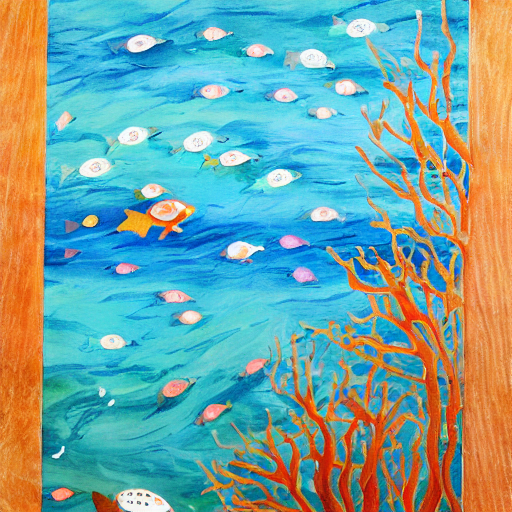

In [ ]:
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

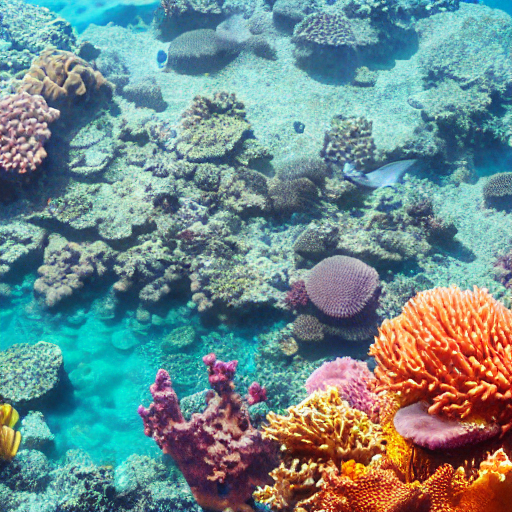

In [ ]:
prompt = "pacific ocean with fish and multiple corals"
image = pipe(prompt).images[0]
display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

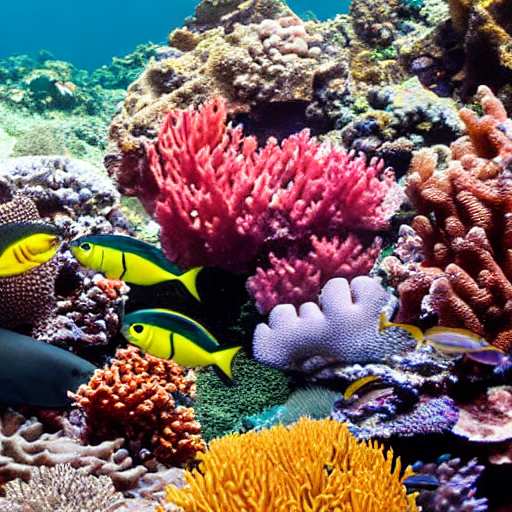

In [ ]:
prompt = "pacific ocean with various fish among which are sharks and multiple bright colorful corals"
image = pipe(prompt).images[0]
display(image)

IS evaluation metric

In [ ]:
from diffusers import StableDiffusionPipeline
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
import tensorflow as tf
from PIL import Image
import numpy as np
from tqdm import tqdm
import torch

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")

prompt = "pacific ocean with various fish among which are sharks and multiple bright colorful corals"

# Generate 50 images
num_images = 50
generated_images = []
for _ in tqdm(range(num_images), desc="Generating images"):
    image = pipe(prompt).images[0]
    generated_images.append(image)

# Preprocess images for InceptionV3
def preprocess_images(images):
    processed = []
    for img in images:
        img = img.resize((299, 299))
        x = np.array(img).astype(np.float32)
        if x.shape[-1] == 4:
            x = x[..., :3]  # drop alpha channel
        processed.append(x)
    processed = np.array(processed)
    return preprocess_input(processed)

input_data = preprocess_images(generated_images)

# Load InceptionV3 model
inception_model = InceptionV3(include_top=True, weights='imagenet')

# Run inference
predictions = inception_model.predict(input_data, batch_size=16)
softmax_preds = tf.nn.softmax(predictions).numpy()

# Compute Inception Score
def calculate_inception_score(preds, splits=10):
    N = preds.shape[0]
    split_scores = []
    for k in range(splits):
        part = preds[k * (N // splits):(k + 1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i]
            scores.append(np.sum(pyx * (np.log(pyx + 1e-10) - np.log(py + 1e-10))))
        split_scores.append(np.exp(np.mean(scores)))
    return np.mean(split_scores), np.std(split_scores)

# Calculate IS
mean_is, std_is = calculate_inception_score(softmax_preds, splits=5)
print(f"\nInception Score (IS): {mean_is:.4f} ± {std_is:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating images:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   2%|▏         | 1/50 [00:25<20:40, 25.31s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   4%|▍         | 2/50 [00:49<19:40, 24.60s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   6%|▌         | 3/50 [01:14<19:30, 24.89s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   8%|▊         | 4/50 [01:41<19:36, 25.57s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  10%|█         | 5/50 [02:07<19:24, 25.87s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  12%|█▏        | 6/50 [02:33<18:57, 25.85s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  14%|█▍        | 7/50 [02:59<18:36, 25.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  16%|█▌        | 8/50 [03:25<18:14, 26.06s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  18%|█▊        | 9/50 [03:51<17:47, 26.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  20%|██        | 10/50 [04:17<17:21, 26.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  22%|██▏       | 11/50 [04:44<16:56, 26.07s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  24%|██▍       | 12/50 [05:10<16:31, 26.10s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  26%|██▌       | 13/50 [05:36<16:07, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  28%|██▊       | 14/50 [06:02<15:42, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  30%|███       | 15/50 [06:29<15:17, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  32%|███▏      | 16/50 [06:55<14:50, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  34%|███▍      | 17/50 [07:21<14:22, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  36%|███▌      | 18/50 [07:47<13:58, 26.19s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  38%|███▊      | 19/50 [08:13<13:32, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  40%|████      | 20/50 [08:39<13:04, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  42%|████▏     | 21/50 [09:05<12:38, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  44%|████▍     | 22/50 [09:32<12:12, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  46%|████▌     | 23/50 [09:58<11:47, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  48%|████▊     | 24/50 [10:24<11:21, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  50%|█████     | 25/50 [10:50<10:53, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  52%|█████▏    | 26/50 [11:16<10:28, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  54%|█████▍    | 27/50 [11:43<10:02, 26.19s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  56%|█████▌    | 28/50 [12:09<09:35, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  58%|█████▊    | 29/50 [12:35<09:08, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  60%|██████    | 30/50 [13:01<08:42, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  62%|██████▏   | 31/50 [13:27<08:16, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  64%|██████▍   | 32/50 [13:53<07:50, 26.12s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  66%|██████▌   | 33/50 [14:19<07:23, 26.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  68%|██████▊   | 34/50 [14:45<06:58, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  70%|███████   | 35/50 [15:12<06:32, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  72%|███████▏  | 36/50 [15:38<06:06, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  74%|███████▍  | 37/50 [16:04<05:41, 26.24s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  76%|███████▌  | 38/50 [16:30<05:14, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  78%|███████▊  | 39/50 [16:56<04:47, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  80%|████████  | 40/50 [17:23<04:21, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  82%|████████▏ | 41/50 [17:49<03:55, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  84%|████████▍ | 42/50 [18:15<03:29, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  86%|████████▌ | 43/50 [18:41<03:03, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  88%|████████▊ | 44/50 [19:08<02:37, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  90%|█████████ | 45/50 [19:34<02:11, 26.24s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  92%|█████████▏| 46/50 [20:00<01:44, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  94%|█████████▍| 47/50 [20:26<01:18, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  96%|█████████▌| 48/50 [20:52<00:52, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  98%|█████████▊| 49/50 [21:18<00:26, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images: 100%|██████████| 50/50 [21:45<00:00, 26.10s/it]


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step

Inception Score (IS): 1.0001 ± 0.0000


In [ ]:
import matplotlib.pyplot as plt

num_images = len(generated_images)
cols = 5
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(15, rows * 3))

for i, img in enumerate(generated_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
prompt = "dogs playing on grass"

# Generate 50 images
num_images = 50
generated_images = []
for _ in tqdm(range(num_images), desc="Generating images"):
    image = pipe(prompt).images[0]
    generated_images.append(image)

# Preprocess images for InceptionV3
def preprocess_images(images):
    processed = []
    for img in images:
        img = img.resize((299, 299))
        x = np.array(img).astype(np.float32)
        if x.shape[-1] == 4:
            x = x[..., :3]  # drop alpha channel
        processed.append(x)
    processed = np.array(processed)
    return preprocess_input(processed)

input_data = preprocess_images(generated_images)

# Load InceptionV3 model
inception_model = InceptionV3(include_top=True, weights='imagenet')

# Run inference
predictions = inception_model.predict(input_data, batch_size=16)
softmax_preds = tf.nn.softmax(predictions).numpy()

# Compute Inception Score
def calculate_inception_score(preds, splits=10):
    N = preds.shape[0]
    split_scores = []
    for k in range(splits):
        part = preds[k * (N // splits):(k + 1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i]
            scores.append(np.sum(pyx * (np.log(pyx + 1e-10) - np.log(py + 1e-10))))
        split_scores.append(np.exp(np.mean(scores)))
    return np.mean(split_scores), np.std(split_scores)

# Calculate IS
mean_is, std_is = calculate_inception_score(softmax_preds, splits=5)
print(f"\nInception Score (IS): {mean_is:.4f} ± {std_is:.4f}")

Generating images:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   2%|▏         | 1/50 [00:25<20:33, 25.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   4%|▍         | 2/50 [00:51<20:44, 25.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   6%|▌         | 3/50 [01:18<20:34, 26.27s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:   8%|▊         | 4/50 [01:44<19:58, 26.06s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  10%|█         | 5/50 [02:10<19:31, 26.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  12%|█▏        | 6/50 [02:36<19:11, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  14%|█▍        | 7/50 [03:02<18:45, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  16%|█▌        | 8/50 [03:28<18:17, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  18%|█▊        | 9/50 [03:54<17:51, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  20%|██        | 10/50 [04:21<17:27, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  22%|██▏       | 11/50 [04:47<17:00, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  24%|██▍       | 12/50 [05:13<16:33, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  26%|██▌       | 13/50 [05:39<16:08, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  28%|██▊       | 14/50 [06:05<15:40, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  30%|███       | 15/50 [06:31<15:13, 26.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  32%|███▏      | 16/50 [06:57<14:49, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  34%|███▍      | 17/50 [07:24<14:24, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  36%|███▌      | 18/50 [07:50<13:58, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  38%|███▊      | 19/50 [08:16<13:32, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  40%|████      | 20/50 [08:42<13:05, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  42%|████▏     | 21/50 [09:08<12:38, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  44%|████▍     | 22/50 [09:35<12:14, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  46%|████▌     | 23/50 [10:01<11:47, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  48%|████▊     | 24/50 [10:27<11:20, 26.16s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  50%|█████     | 25/50 [10:53<10:55, 26.21s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  52%|█████▏    | 26/50 [11:20<10:29, 26.25s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  54%|█████▍    | 27/50 [11:46<10:03, 26.23s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  56%|█████▌    | 28/50 [12:12<09:36, 26.19s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  58%|█████▊    | 29/50 [12:38<09:10, 26.20s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  60%|██████    | 30/50 [13:04<08:44, 26.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  62%|██████▏   | 31/50 [13:31<08:17, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  64%|██████▍   | 32/50 [13:57<07:50, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  66%|██████▌   | 33/50 [14:23<07:25, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  68%|██████▊   | 34/50 [14:49<06:58, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  70%|███████   | 35/50 [15:15<06:31, 26.12s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  72%|███████▏  | 36/50 [15:41<06:05, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  74%|███████▍  | 37/50 [16:07<05:39, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  76%|███████▌  | 38/50 [16:34<05:14, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  78%|███████▊  | 39/50 [17:00<04:48, 26.19s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  80%|████████  | 40/50 [17:26<04:21, 26.18s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  82%|████████▏ | 41/50 [17:52<03:55, 26.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  84%|████████▍ | 42/50 [18:18<03:29, 26.15s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  86%|████████▌ | 43/50 [18:44<03:02, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  88%|████████▊ | 44/50 [19:10<02:36, 26.14s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  90%|█████████ | 45/50 [19:37<02:10, 26.13s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  92%|█████████▏| 46/50 [20:03<01:44, 26.12s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  94%|█████████▍| 47/50 [20:29<01:18, 26.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  96%|█████████▌| 48/50 [20:55<00:52, 26.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images:  98%|█████████▊| 49/50 [21:21<00:26, 26.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

Generating images: 100%|██████████| 50/50 [21:47<00:00, 26.15s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step

Inception Score (IS): 1.0001 ± 0.0000


In [ ]:
import matplotlib.pyplot as plt

num_images = len(generated_images)
cols = 5
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(15, rows * 3))

for i, img in enumerate(generated_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.